In [1]:
import pandas as pd

In [2]:
customer = pd.read_csv('./Customer_info.csv')
discount = pd.read_csv('./Discount_info.csv')
marketing = pd.read_csv('./Marketing_info.csv')
tax = pd.read_csv('./Tax_info.csv')
onlinesales = pd.read_csv('./Onlinesales_info.csv')

In [3]:
print("customer")
print(customer.head(3))
print("\ndiscount")
print(discount.head(3))
print("\nmarketing")
print(marketing.head(3))
print("\nonlinesales")
print(onlinesales.head(3))
print("\ntax")
print(tax.head(3))

customer
        고객ID 성별        고객지역  가입기간
0  USER_1358  남     Chicago    12
1  USER_0190  남  California    43
2  USER_0066  남     Chicago    33

discount
     월   제품카테고리    쿠폰코드  할인율
0  Jan  Apparel  SALE10   10
1  Feb  Apparel  SALE20   20
2  Mar  Apparel  SALE30   30

marketing
           날짜  오프라인비용    온라인비용
0  2019-01-01    4500  2424.50
1  2019-01-02    4500  3480.36
2  2019-01-03    4500  1576.38

onlinesales
        고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   

     평균금액  배송료  쿠폰상태  
0  153.71  6.5  Used  
1  153.71  6.5  Used  
2    2.05  6.5  Used  

tax
     제품카테고리   GST
0  Nest-USA  0.10
1    Office  0.10
2   Apparel  0.18


### EDA

#### 1. 카테고리별로 탐색

In [4]:
# 카테고리별 주문량 계산
category_order_volume = onlinesales.groupby('제품카테고리').size().reset_index(name='주문건수')

# 카테고리별 총 주문 수량 계산
category_order_quantity = onlinesales.groupby('제품카테고리')['수량'].sum().reset_index(name='총주문수량')

# 결과 결합
category_analysis = pd.merge(category_order_volume, category_order_quantity, on='제품카테고리')

# 주문량 기준 내림차순 정렬
category_analysis_sorted = category_analysis.sort_values(by='주문건수', ascending=False)

# 평균 구매 수량 열 추가
category_analysis_sorted['평균구매수량'] =  category_analysis_sorted['총주문수량'] / category_analysis_sorted['주문건수']

print(category_analysis_sorted.to_markdown(index=False))

| 제품카테고리         |   주문건수 |   총주문수량 |   평균구매수량 |
|:---------------------|-----------:|-------------:|---------------:|
| Apparel              |      18126 |        32438 |        1.78958 |
| Nest-USA             |      14013 |        21430 |        1.52929 |
| Office               |       6513 |        88383 |       13.5702  |
| Drinkware            |       3483 |        30501 |        8.75711 |
| Lifestyle            |       3092 |        24881 |        8.0469  |
| Nest                 |       2198 |         2837 |        1.29072 |
| Bags                 |       1882 |        15273 |        8.1153  |
| Headgear             |        771 |         3533 |        4.58236 |
| Notebooks & Journals |        749 |         9556 |       12.7583  |
| Waze                 |        554 |         1144 |        2.06498 |
| Nest-Canada          |        317 |          469 |        1.4795  |
| Bottles              |        268 |         2090 |        7.79851 |
| Accessories          |        234 |    

In [5]:
mean_order_count = category_analysis['주문건수'].mean()
total_order_count = category_analysis['주문건수'].sum()
print("총 주문건수 평균", mean_order_count, "\n총 주문건수 합계:", total_order_count)

총 주문건수 평균 2646.2 
총 주문건수 합계: 52924


1. 주문건수: 해당 카테고리의 총 주문 건수
2. 총주문수량: 해당 카테고리의 주문된 제품의 총 수량
3. 평균구매수량 : 해당 카테고리에서 한 건당 평균적으로 구매된 제품의 수량

- 주문 건수가 많다고해서 구매 수량이 많은 것은 아니다

- 특이한 분포를 보이는 데이터는 다음과 같다

    - Apparel: 주문 건수가 18.126건으로 제일 많음에도 한 건당 구매 수량이 약 1.79개밖에 되지 않음
    - Office: 주문 건수 6,513건으로 많은 편에 속하고 한 건당 구매 수량이 약 13.57개로 주문 횟수도 많고 한 번 주문시 대량 주문을 많이 하는 품목임, 사무용품
    - Housewares: 주문 건수는 비교적 작은 122건이지만 한 건당 구매 수량은 약 20.36개로 가장 높다. 한 번에 대량 주문을 하는 품목

#### 1-2. 카테고리별 쿠폰 사용 여부

In [6]:
# 제품 카테고리별 쿠폰 사용 여부 집계
coupon_usage = onlinesales.groupby(['제품카테고리', '쿠폰상태']).size().unstack(fill_value=0)

# 쿠폰 사용 비율 계산 (쿠폰을 사용한 건수 / 총 건수)
coupon_usage['Clicked Rate'] = coupon_usage['Clicked'] / (coupon_usage['Used'] + coupon_usage['Not Used'] + coupon_usage['Clicked'])
coupon_usage['Used Rate'] = coupon_usage['Used'] / (coupon_usage['Used'] + coupon_usage['Not Used'] + coupon_usage['Clicked'])
coupon_usage['Not Used Rate'] = coupon_usage['Not Used'] / (coupon_usage['Used'] + coupon_usage['Not Used'] + coupon_usage['Clicked'])

# 'Clicked Rate', 'Usage Rate', 'Not Used Rate' 열만 선택하여 출력
print(coupon_usage[['Clicked Rate', 'Used Rate', 'Not Used Rate']])

쿠폰상태                  Clicked Rate  Used Rate  Not Used Rate
제품카테고리                                                      
Accessories               0.534188   0.329060       0.136752
Android                   0.534884   0.232558       0.232558
Apparel                   0.508827   0.339623       0.151550
Backpacks                 0.528090   0.303371       0.168539
Bags                      0.516472   0.332094       0.151435
Bottles                   0.514925   0.305970       0.179104
Drinkware                 0.503015   0.333333       0.163652
Fun                       0.518750   0.325000       0.156250
Gift Cards                0.509434   0.352201       0.138365
Google                    0.485714   0.276190       0.238095
Headgear                  0.520104   0.332036       0.147860
Housewares                0.557377   0.295082       0.147541
Lifestyle                 0.494502   0.356080       0.149418
More Bags                 0.543478   0.391304       0.065217
Nest                    

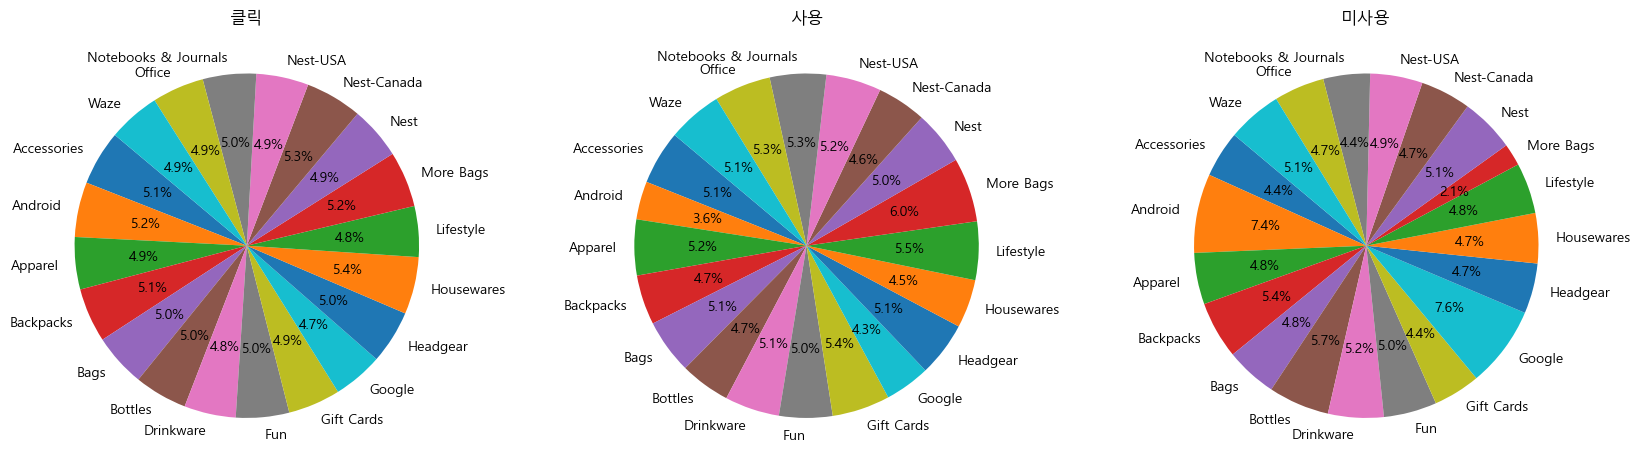

In [49]:
import matplotlib.pyplot as plt

# 쿠폰 상태에 따른 비율 데이터
categories = coupon_usage.index
clicked_rate = coupon_usage['Clicked Rate']
used_rate = coupon_usage['Used Rate']
not_used_rate = coupon_usage['Not Used Rate']

# 원 그래프
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True, squeeze=False, gridspec_kw={'wspace': 0.3})

# 제품 카테고리별로 쿠폰 상태 비율을 원 그래프로 표시
axes[0, 0].pie(clicked_rate, labels=categories, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('클릭')
axes[0, 1].pie(used_rate, labels=categories, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('사용')
axes[0, 2].pie(not_used_rate, labels=categories, autopct='%1.1f%%', startangle=140)
axes[0, 2].set_title('미사용')
plt.show()

1. Clicked: 쿠폰 사용 클릭(실제 사용 x)
2. Used: 쿠폰 사용
3. Not Used: 쿠폰 사용 x

- 거의 대부분의 카테고리에서 clicked 비율이 50%를 웃돈다. 클릭만 하고 실제로 사용하지 않았다는 뜻

- 특히, More Bags의 품목의 경우 Used 비율의 가장 높은 것으로 보아 대부분의 구매자가 쿠폰을 사용한다는 점을 알 수 있음

#### 1-3. 지역별 평균 배송료

In [8]:
# 고객 정보와 온라인 판매 정보 결합
merged_data = pd.merge(onlinesales, customer[['고객ID', '고객지역']], on='고객ID', how='left')

# 지역별 평균 배송비 계산
average_shipping_fee = merged_data.groupby('고객지역')['배송료'].mean().reset_index()
print(average_shipping_fee)

            고객지역        배송료
0     California  10.718275
1        Chicago  10.507412
2     New Jersey   9.496165
3       New York  10.698711
4  Washington DC  10.344374


- 지역별 평균 배송료는 9에서 10으로 대체로 비슷한 비용

#### 1-4. 지역별 고객 수

In [9]:
# 지역별 고유 고객 수 계산 및 열 이름 변경
unique_user_count_by_region = customer.groupby('고객지역')['고객ID'].nunique().reset_index(name='고유 고객 수')

# 결과를 내림차순으로 정렬
unique_user_count_by_region_sorted = unique_user_count_by_region.sort_values('고유 고객 수', ascending=False)
unique_user_count_by_region_sorted

,고객지역,고유 고객 수
0,California,464
1,Chicago,456
3,New York,324
2,New Jersey,149
4,Washington DC,75


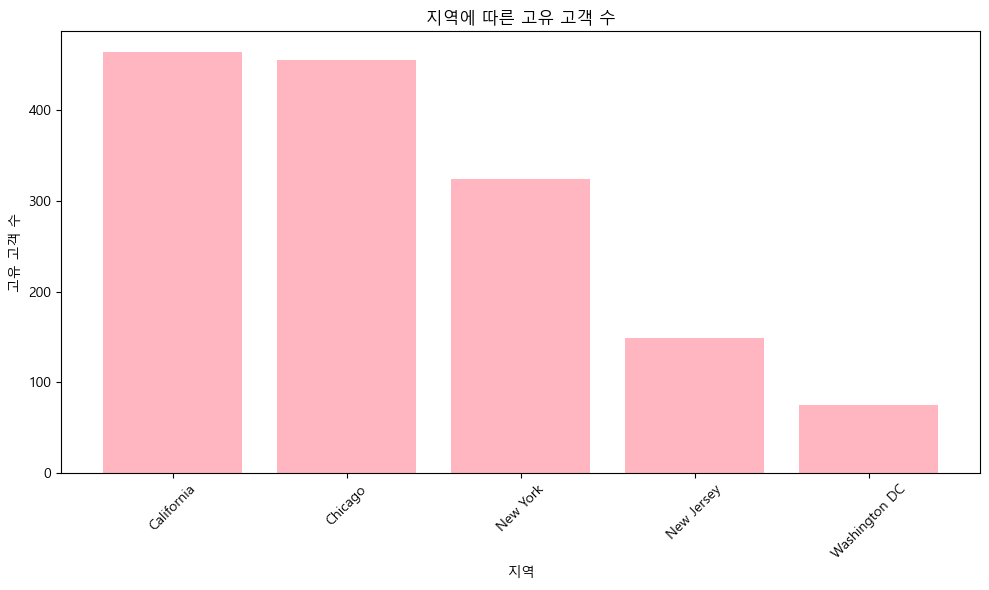

In [52]:
# 고객지역별 고유 고객 수 데이터
regions = unique_user_count_by_region_sorted['고객지역']
unique_users = unique_user_count_by_region_sorted['고유 고객 수']

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(regions, unique_users, color='lightpink')
plt.title('지역에 따른 고유 고객 수')
plt.xlabel('지역')
plt.ylabel('고유 고객 수')
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.tight_layout()
plt.show()

- California와 Chicago의 고객은 400명 이상으로 전체 고객의 60% 이상을 차지한다. 반면에 Washington DC는 75명으로 비교적 적은 고객 수가 거주한다.

#### 1-5. 가입기간에 따른 고객 수

In [11]:
# 가입기간을 구간별로 나누어 고객 수 계산
bins = [0, 12, 24, 36, float('inf')]
labels = ['1~12개월', '13~24개월', '25~36개월', '37개월 이후']  # 구간별 레이블
customer['가입기간 구간'] = pd.cut(customer['가입기간'], bins=bins, labels=labels)

# 구간별 고객 수 계산
customer_counts_by_period_group = customer['가입기간 구간'].value_counts().reset_index(name='고객 수').rename(columns={'index': '가입기간 구간'})
customer_counts_by_period_group

,가입기간 구간,고객 수
0,37개월 이후,414
1,25~36개월,366
2,13~24개월,361
3,1~12개월,327


- 1년(12개월)을 기준으로 가입 기간 구간을 나눔
- 모든 구간에서 분포가 비슷한걸로 보아 매년 300명 이상의 신규 고객 유입이 꾸준히 있는 것으로 파악. 

#### 1-6. 마케팅 비용에 따른 매출액 영향

In [12]:
#월별 매출액 데이터 생성
#매출액 = 수량 x 평균금액 + 배송료

onlinesales['매출액'] = onlinesales['평균금액'] * onlinesales['수량'] + onlinesales['배송료']

# '거래날짜'에서 월 정보 추출
onlinesales['월'] = pd.to_datetime(onlinesales['거래날짜']).dt.month

# 월별 매출액 집계
monthly_sales = onlinesales.groupby('월')['매출액'].sum().reset_index()

# 마케팅 정보에서 '날짜'를 사용해 월 정보 추출
marketing['월'] = pd.to_datetime(marketing['날짜']).dt.month

# 월별 마케팅 비용 집계
monthly_marketing_costs = marketing.groupby('월').agg({'오프라인비용': 'sum', '온라인비용': 'sum'}).reset_index()

# 월별 매출액과 마케팅 비용 결합
monthly_sales_and_costs = pd.merge(monthly_sales, monthly_marketing_costs, on='월', how='left')

# 총 마케팅 비용 열 추가 (오프라인비용 + 온라인비용)
monthly_sales_and_costs['총마케팅비용'] = monthly_sales_and_costs['오프라인비용'] + monthly_sales_and_costs['온라인비용']
monthly_sales_and_costs

,월,매출액,오프라인비용,온라인비용,총마케팅비용
0,1,462866.90,96600,58328.95,154928.95
1,2,360036.40,81300,55807.92,137107.92
2,3,410408.03,73500,48750.09,122250.09
3,4,443100.16,96000,61026.83,157026.83
4,5,349159.59,65500,52759.64,118259.64
5,6,358594.96,80500,53818.14,134318.14
6,7,421362.00,67500,52717.85,120217.85
7,8,462309.94,85500,57404.15,142904.15
8,9,401553.82,83000,52514.54,135514.54
9,10,455643.16,93500,57724.65,151224.65


In [13]:
# 매출액과 오프라인/온라인 비용 간의 상관계수 계산
correlation = monthly_sales_and_costs[['매출액', '오프라인비용', '온라인비용', '총마케팅비용']].corr()
correlation

,매출액,오프라인비용,온라인비용,총마케팅비용
매출액,1.000000,0.790355,0.850355,0.832998
오프라인비용,0.790355,1.000000,0.879841,0.986571
온라인비용,0.850355,0.879841,1.000000,0.945652
총마케팅비용,0.832998,0.986571,0.945652,1.000000


- 오프라인비용, 온라인비용, 총마케팅비용은 모두 매출액과 높은 상관관계를 보인다. 이는 마케팅 비용이 매출액과 관계가 있으며, 영향력이 있음을 알 수 있다

- 오프라인비용이 온라인비용에 비해 매출액과 조금 더 높은 상관관계를 보이는데, 온라인 마케팅 활동이 매출에 더 영향을 준다는 것을 알 수 있음

#### 2. 고객 세분화, RFM 분석

- Recency : 최근 거래로부터의 일 수 (데이터셋 내에서 가장 최근 거래 날짜 - 고객의 최근 거래날짜)

- Frequency : 고유 거래ID의 수, 즉 거래 빈도
- Monetary : 총 구매 금액

고객이 얼마나 최근에 구매를 했는지, 얼마나 자주 구매를 하는지, 그리고 구매 시 얼마나 많은 돈을 지출하는지를 나타낸다

#### 2-1. 고객 세분화 시각화

In [14]:
# 거래날짜를 datetime 형태로 변환
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])

# Monetary Value 계산
onlinesales['총구매금액'] = onlinesales['평균금액'] * onlinesales['수량']

# RFM 데이터 생성
rfm_data = onlinesales.groupby('고객ID').agg({
    '거래날짜': lambda x: (onlinesales['거래날짜'].max() - x.max()).days,
    '거래ID': 'nunique',
    '총구매금액': 'sum'
}).rename(columns={'거래날짜': 'Recency', '거래ID': 'Frequency', '총구매금액': 'MonetaryValue'})
rfm_data.reset_index(inplace=True)

# RFM 데이터와 고객 정보 데이터 병합
rfm_customer_data = pd.merge(rfm_data, customer, how='left', on='고객ID')

# 할인 사용 여부 추가
onlinesales['할인사용여부'] = onlinesales['쿠폰상태'].apply(lambda x: 1 if x == 'Used' else 0)

# 고객별 할인 사용 횟수 계산
discount_usage = onlinesales.groupby('고객ID')['할인사용여부'].sum().reset_index()

# RFM 데이터와 할인 사용 데이터 병합
rfm_customer_discount_data = pd.merge(rfm_customer_data, discount_usage, how='left', on='고객ID')

In [15]:
rfm_customer_discount_data.head(3)

,고객ID,Recency,Frequency,MonetaryValue,성별,고객지역,가입기간,가입기간 구간,할인사용여부
0,USER_0000,107,1,30.99,여,New York,31,25~36개월,2
1,USER_0001,59,31,13834.90,남,New York,20,13~24개월,20
2,USER_0002,73,8,1442.12,남,California,39,37개월 이후,11


In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

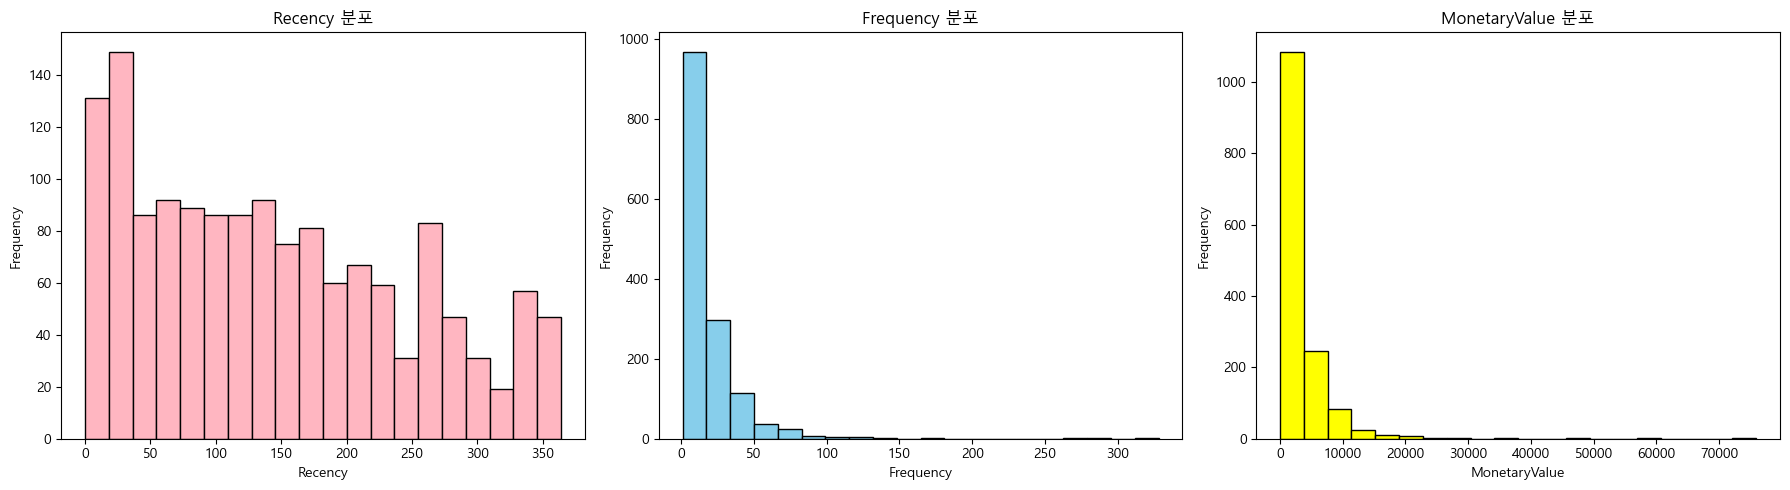

In [35]:
# RFM 데이터 시각화
plt.figure(figsize=(18, 5))

# Recency 분포 시각화
plt.subplot(1, 3, 1)
plt.hist(rfm_data['Recency'], bins=20, color='lightpink', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency 분포')

plt.subplot(1, 3, 2)
plt.hist(rfm_data['Frequency'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency 분포')

plt.subplot(1, 3, 3)
plt.hist(rfm_data['MonetaryValue'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('MonetaryValue')
plt.ylabel('Frequency')
plt.title('MonetaryValue 분포')

plt.tight_layout()
plt.show()

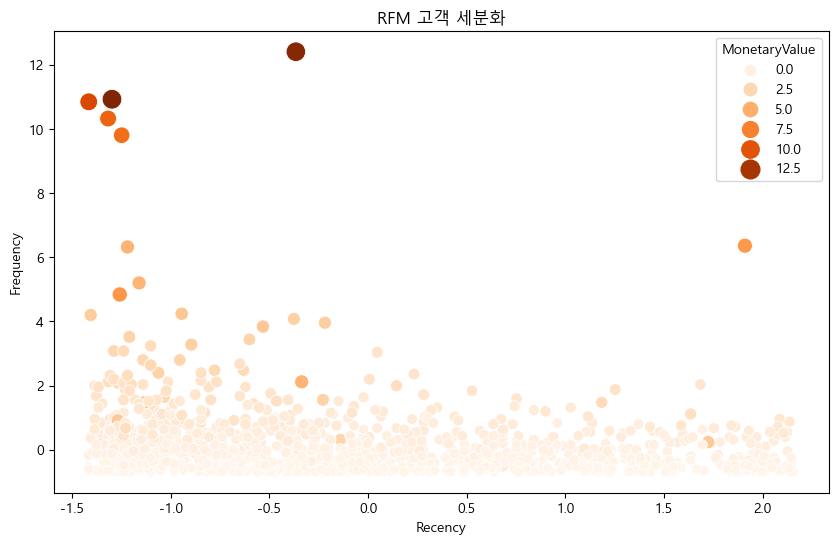

In [38]:
#고객 세분화 결과 시각화
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='MonetaryValue', 
                data=rfm_customer_data, size='MonetaryValue', sizes=(50, 200), palette='Oranges')
plt.title('RFM 고객 세분화')
plt.show()

- 대부분의 고객은 낮은 빈도 수와 금액을 가지고, 소수의 고객만 매우 높은 빈도와 금액을 가진다.

- 최근에 구매한 고객은 빈도와 금액에 다양하게 분포한다

##### 결론

1. VIP 고객: 높은 Frequency, 높은 Monetary Value

  - 소수지만, 비즈니스에 가치 있는 고객이다. 이들은 집중적인 고객 관리와 맞춤형 마케팅 전략으로 붙잡아둬야 하는 고객이다.

\
2. 잠재 이탈 고객: 높은 Recency

   - 오랫동안 구매하지않은 고객으로, 잠재 이탈 위험이 있다. 이들을 재구매로 끌어들일 '재활성화 쿠폰'와 같은 마케팅 전략이 필요하다.
 
\
3. 일반 고객: 낮은 Frequency, 낮은 Monetary Value

   - 대다수의 고객으로, 이들의 구매 빈도와 금액을 증가시킬 수 있는 프로모션을 마련해야 한다.

#### 2-1. Monetary Value값을 기준으로 고객 그룹 분류 및 시각화

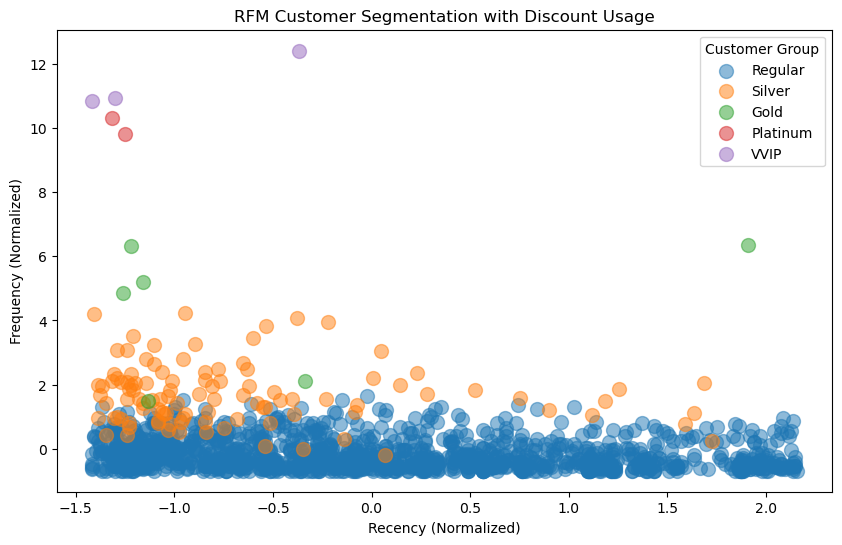

In [18]:
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_customer_data[['Recency', 'Frequency', 'MonetaryValue']])
rfm_customer_data[['Recency', 'Frequency', 'MonetaryValue']] = rfm_normalized

def label_customer_group(value):
    if value > 10:
        return 'VVIP'
    elif value > 7:
        return 'Platinum'
    elif value > 4:
        return 'Gold'
    elif value > 1:
        return 'Silver'
    else:
        return 'Regular'

# MonetaryValue 값에 따라 새로운 라벨 컬럼을 생성
rfm_customer_data['CustomerGroup'] = rfm_customer_data['MonetaryValue'].apply(label_customer_group)

# 시각화
plt.figure(figsize=(10, 6))
for group in ['Regular', 'Silver', 'Gold', 'Platinum', 'VVIP']:
    subset = rfm_customer_data[rfm_customer_data['CustomerGroup'] == group]
    plt.scatter(subset['Recency'], subset['Frequency'], s=100, label=group, alpha=0.5)  # alpha 값을 조정하여 색상을 연하게 만듭니다.
plt.legend(title='Customer Group')
plt.xlabel('Recency (Normalized)')
plt.ylabel('Frequency (Normalized)')
plt.title('RFM Customer Segmentation with Discount Usage')
plt.show()

최근 1년의 데이터이므로, Monetary Value만이 고객 등급에 가장 큰 영향을 미치는 것으로 판단하여 구매 금액만을 기준으로 고객 등급을 분류함

##### 고객 등급 분류 기준

1. VVIP: value > 10
2. Platinum : value > 7
3. Gold: value > 4
4. Silver: value > 1
5. Regular: 그 외

- 고객 등급이 높아질수록 소수의 고객이 분포한다.

#### 2-2. 조금 더 세분화된 고객 분류: RFM+K-means Clustering

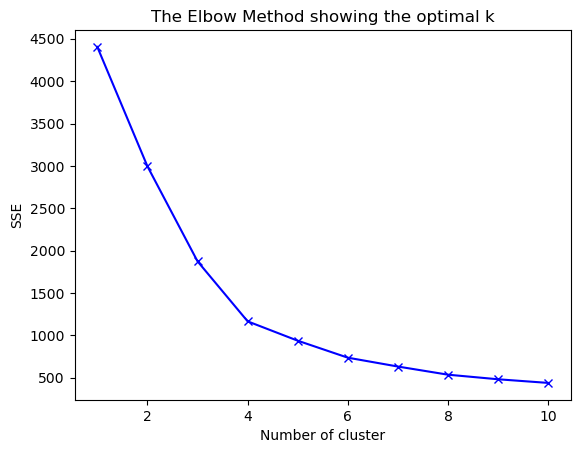

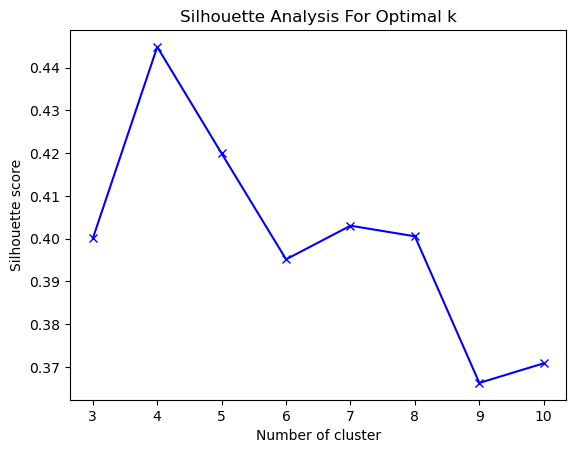

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# 최적의 클러스터 수 찾기 (Elbow Method)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_  # SSE for each n_clusters

# 최적의 클러스터 수를 찾기 위한 SSE 값 시각화
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Silhouette 점수를 통한 클러스터 평가
silhouette_scores = {}
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    score = silhouette_score(rfm_normalized, kmeans.labels_)
    silhouette_scores[k] = score

# 최적의 클러스터 수를 찾기 위한 Silhouette 점수 시각화
plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.title('Silhouette Analysis For Optimal k')
plt.show()

K-means Clustering애서 군집 수를 결정하는데 사용되는 엘보우 방법, 실루엣 분석 사용

1. 엘보우 방법: 군집 수 대비 SSE를 나타내, SSE값이 급격히 꺾이는 지점을 찾는다

2. 실루엣 분석: 군집화의 품질을 평가하는데 사용, +1에 가까울수록 좋은 클러스터링을 의미

- 엘보우 방법에서 cluster수가 4부터 감소가 완만해진다. 또, 실루엣 점수가 가장 높은 cluster수는 4이다.

- 두 방법을 통해 cluster수를 4로 설정하는 것이 최적임을 확인

#### 2-3. 선정된 4개의 Cluster별 기술통계

In [20]:
# KMeans 클러스터링 수행
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
kmeans = KMeans(n_clusters=4, random_state=1)
rfm_customer_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# 클러스터별 기술통계
rfm_customer_discount_data['Cluster'] = rfm_customer_data['Cluster']
cluster_summary_with_id = rfm_customer_discount_data.groupby('Cluster')[['Recency','Frequency','MonetaryValue']].mean()
cluster_summary_with_id

,Recency,Frequency,MonetaryValue
Cluster,,,
0,78.364656,12.129032,1970.578050
1,254.767399,10.309524,1665.046795
2,65.125000,242.375000,50023.540000
3,81.208955,51.815920,9733.674627


In [21]:
# 각 클러스터의 고객 수 출력
cluster_counts=rfm_customer_discount_data['Cluster'].value_counts()
print("<클러스터별 고객 수>")
cluster_counts

<클러스터별 고객 수>


0    713
1    546
3    201
2      8
Name: Cluster, dtype: int64

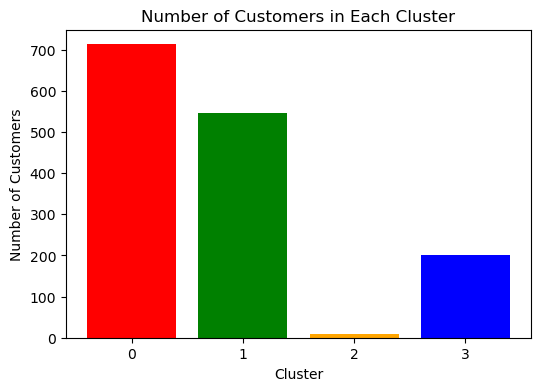

In [22]:
#각 클러스터의 고객 수 시각화
plt.figure(figsize=(6, 4))
plt.bar(cluster_counts.index, cluster_counts.values, color=['red', 'green', 'blue', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.xticks(cluster_counts.index)  # x축 눈금을 클러스터 값으로 설정
plt.show()

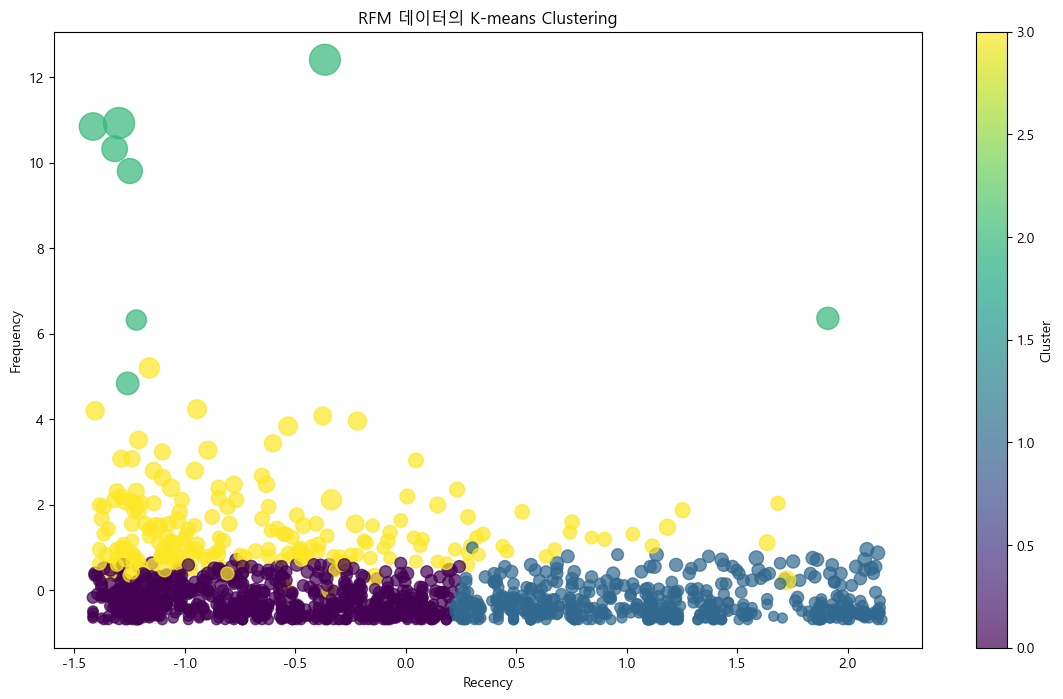

In [47]:
# MonetaryValue를 원의 크기로 매핑
def map_monetary_to_size(monetary_value):
    min_size = 50
    max_size = 500
    min_value = rfm_customer_data['MonetaryValue'].min()
    max_value = rfm_customer_data['MonetaryValue'].max()
    size = (monetary_value - min_value) / (max_value - min_value) * (max_size - min_size) + min_size
    return size

# MonetaryValue를 원의 크기로 매핑하여 적용
sizes = [map_monetary_to_size(value) for value in rfm_customer_data['MonetaryValue']]

# 클러스터링 결과 시각화
plt.figure(figsize=(14, 8))
plt.scatter(rfm_normalized[:, 0], rfm_normalized[:, 1], c=kmeans.labels_, marker='o', alpha=0.7, s=sizes)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM 데이터의 K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

#### 2-4. K-means Clustering을 통한 고객 세분화 결과 기준으로 그룹 분류, 시각화

posx and posy should be finite values
posx and posy should be finite values


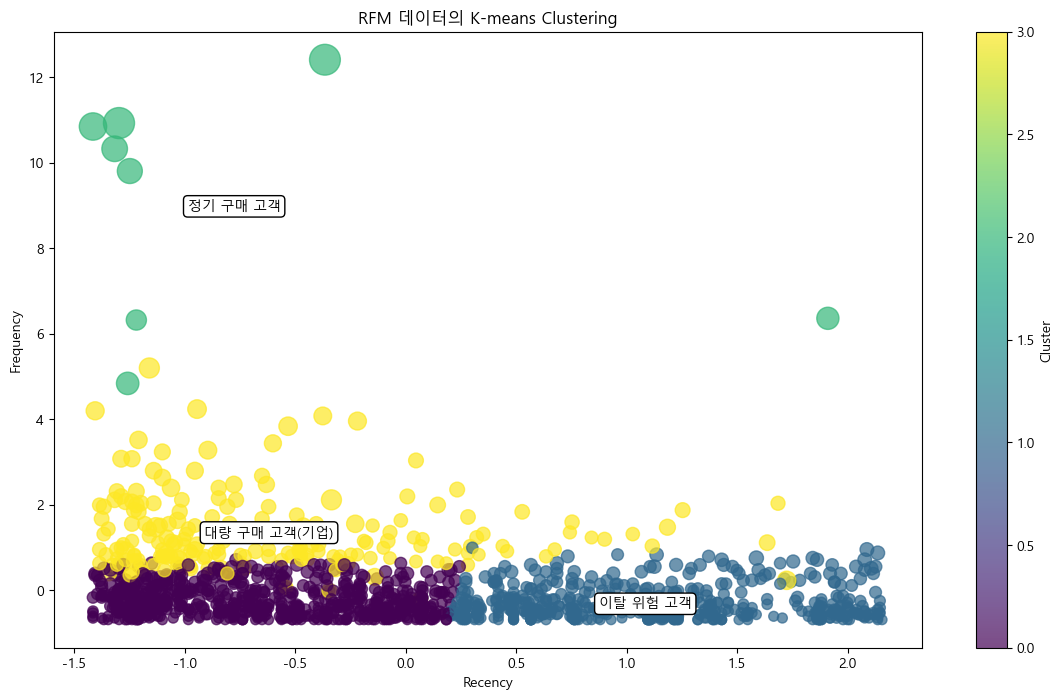

In [43]:
# 클러스터링 결과 시각화
plt.figure(figsize=(14, 8))
scatter = plt.scatter(rfm_normalized[:, 0], rfm_normalized[:, 1], c=kmeans.labels_, marker='o', alpha=0.7, s=sizes)

# 각 그룹의 이름을 지정
cluster_names = {
    1: '이탈 위험 고객',
    2: '정기 구매 고객',
    3: '대량 구매 고객(기업)',
    4: '신규 구매 고객'
}

# 그룹 설명을 그래프 안에 네모박스로 추가
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=1.0)
for key, value in cluster_names.items():
    # 그룹의 중심 좌표 계산
    cluster_center = rfm_normalized[kmeans.labels_ == key].mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], value, ha='center', va='center', bbox=bbox_props)

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM 데이터의 K-means Clustering')
plt.colorbar(scatter, label='Cluster')
plt.plot(color='Set2')
plt.show()

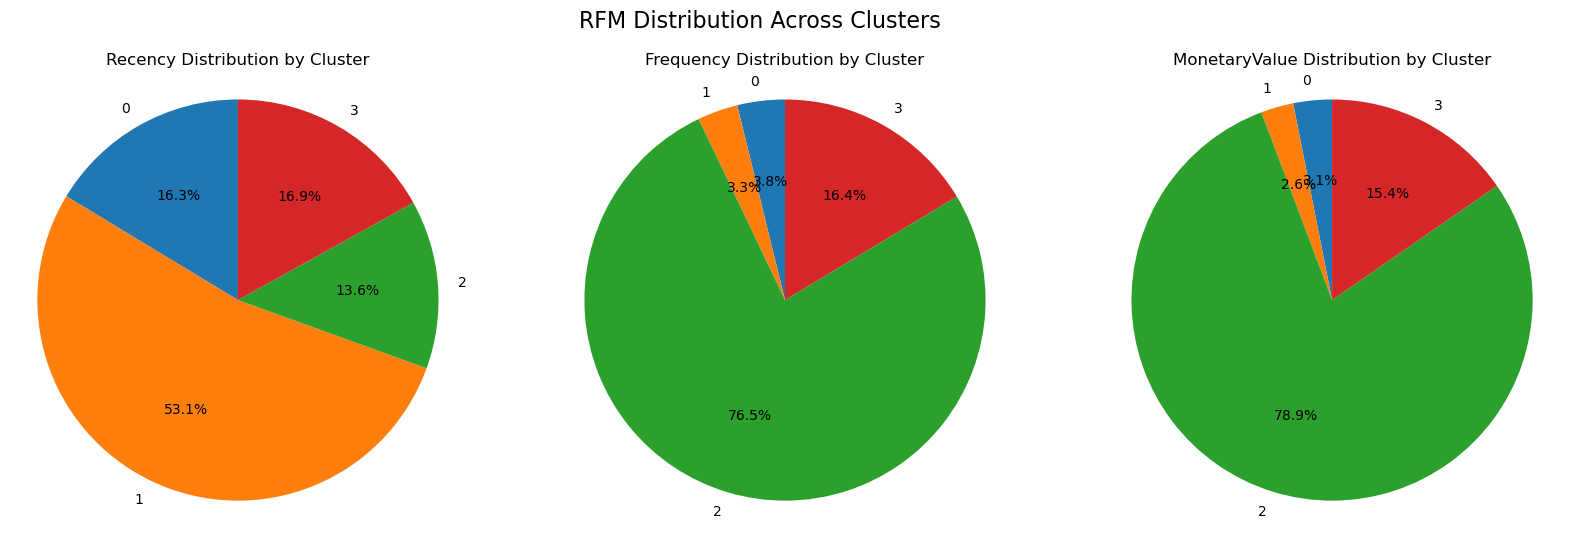

In [25]:
import matplotlib.pyplot as plt

# 클러스터별 평균 RFM 값 가져오기
cluster_avg = rfm_customer_discount_data.groupby('Cluster').mean()

# 각 RFM 컬럼을 클러스터의 평균으로 나누어 정규화
cluster_avg_norm = cluster_avg.div(cluster_avg.sum(axis=0), axis=1)

# 원형 차트 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    ax[i].pie(cluster_avg_norm[col], labels=cluster_avg_norm.index, autopct='%1.1f%%', startangle=90,radius=1.1)
    ax[i].set_title(f'{col} Distribution by Cluster')

plt.suptitle('RFM Distribution Across Clusters', fontsize=16)
plt.show()

##### 군집의 특징 살펴보기

1. Cluster 0: 이탈 위험 그룹(Churn RIsk Group)
    - 높은 Recency, 낮은 Frequency와 MonetaryValue
    - 최근에 구매하지 않았고, 구매 빈도와 금액이 낮아 이탈 가능성이 높음
    
    
2. Cluster 1: 주기적 구매 그룹(Periodic Purchase Group)
    - 낮은 Recency, 중간 정도의 Frequency와 MonetaryValue
    - 정기적으로 구매하는 경향이 있음
    
   
3. Cluster 2: 대량 구매 그룹(Bulk Purchase Group)
    - 매우 높은 Frequency와 MonetaryValue
    - 대량으로 구매하는 고객들로 이루어짐
    

4. Cluster 3: 신규 구매자 그룹(New Buyer Group)
    - 낮은 Recency, 높은 Frequency와 MonetaryValue
    - 최근에 구매를 시작한 신규 고객들로 이루어졌을거라 예상

#### 2-5. Cluster별 잔존율 분석

- 데이터가 1년치이고, 고객의 첫 구매 월을 정확히 알 수 없음

1. 월별 활성 고객 집계: 어떤 월에 거래했는지
2. 월별 거래 여부 확인: 각 월마다 거래를 했는지
3. Cluster별 잔존율 계산: 각 군집별 월별 거래 여부를 기반으로
4. Cluster별 잔존율 예측

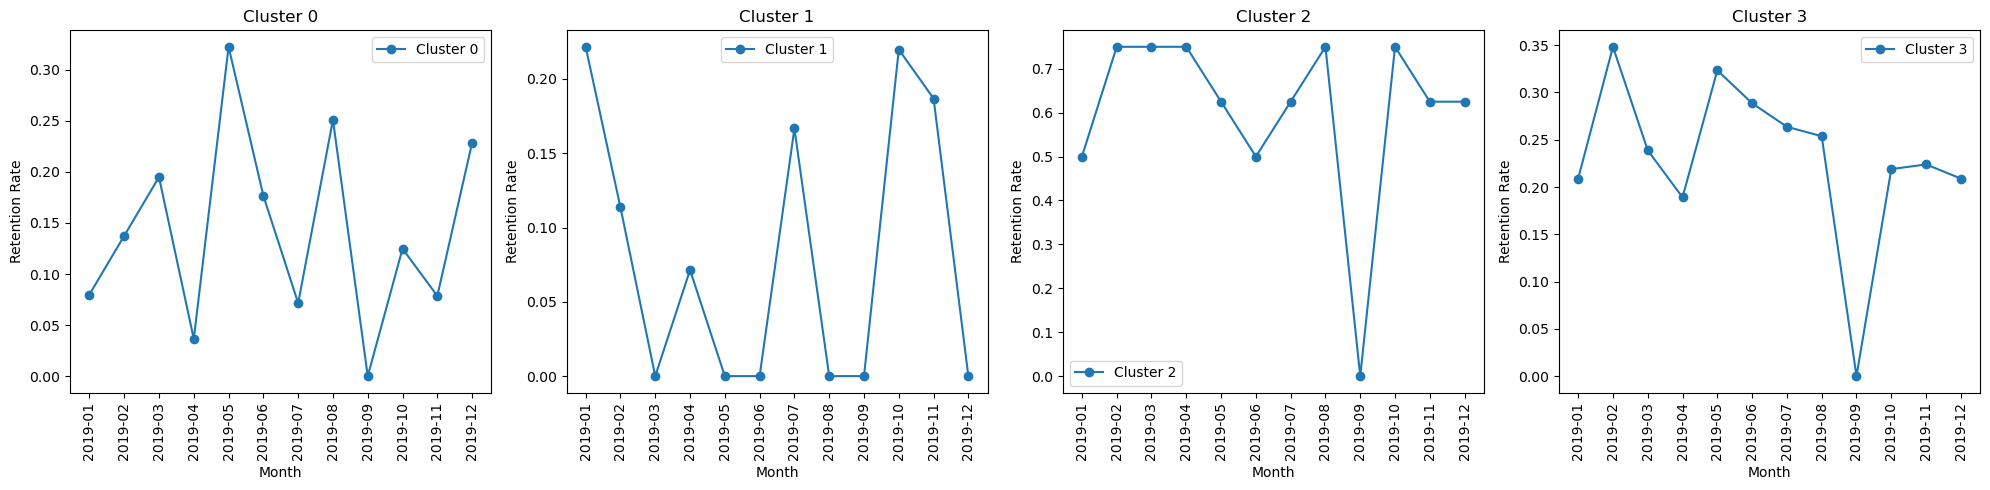

In [26]:
# 거래날짜를 기준으로 월별 데이터 생성
onlinesales['YearMonth'] = onlinesales['거래날짜'].dt.to_period('M')

# 고객별, 월별 거래 존재 여부 확인
monthly_active = onlinesales.groupby(['고객ID', 'YearMonth']).size().reset_index(name='Transactions')

# 월별 전체 고객 목록 생성
all_months = monthly_active['YearMonth'].unique()
all_customers = monthly_active['고객ID'].unique()

# 모든 고객과 모든 월을 포함하도록 데이터 프레임 확장
from itertools import product

all_combinations = pd.DataFrame(list(product(all_customers, all_months)), columns=['고객ID', 'YearMonth'])

# 원본 거래 데이터와 결합하여 거래 여부 확인
expanded_data = pd.merge(all_combinations, monthly_active, on=['고객ID', 'YearMonth'], how='left').fillna(0)

# 클러스터 정보 추가
expanded_data = pd.merge(expanded_data, rfm_customer_discount_data[['고객ID', 'Cluster']], on='고객ID')

# 월별, 클러스터별 잔존율 계산
def calculate_retention_rate(group):
    group['Retained'] = group['Transactions'].shift(1) > 0
    return group

expanded_data = expanded_data.groupby(['고객ID', 'Cluster']).apply(calculate_retention_rate)

# 클러스터별 잔존율 계산
retention_rate = expanded_data.groupby(['YearMonth', 'Cluster'])['Retained'].mean().reset_index()

# 클러스터별 잔존율 시각화를 위한 수정된 코드
clusters = retention_rate['Cluster'].unique()

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, cluster in enumerate(clusters):
    cluster_data = retention_rate[retention_rate['Cluster'] == cluster]
    axs[i].plot(cluster_data['YearMonth'].astype('str'), cluster_data['Retained'], marker='o', linestyle='-', label=f'Cluster {cluster}')
    axs[i].set_title(f'Cluster {cluster}')
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Retention Rate')
    axs[i].legend()
plt.tight_layout()
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

predictions = pd.DataFrame()

# 클러스터별로 반복
for cluster in retention_rate['Cluster'].unique():
    cluster_data = retention_rate[retention_rate['Cluster'] == cluster].copy()
    cluster_data['YearMonth'] = cluster_data['YearMonth'].dt.to_timestamp()
    cluster_data = cluster_data.set_index('YearMonth').sort_index()
    cluster_data['LogRetained'] = np.log(cluster_data['Retained'] + 1)  # 로그 변환 시 0이 있을 경우를 대비해 1을 더함

    # ARIMA 모델 구성 및 학습 (파라미터 조정)
    model = ARIMA(cluster_data['LogRetained'], order=(2,1,2), dates=cluster_data.index, freq='MS')
    model_fit = model.fit()

    # 미래 3개월 잔존율 예측
    forecast = model_fit.forecast(steps=3)
    forecast = np.exp(forecast) - 1  # 로그 변환된 값을 원래 스케일로 역변환

    # 예측 결과 저장
    last_month = cluster_data.index.max()
    future_months = pd.date_range(start=last_month, periods=4, freq='M')[1:]
    future_data = pd.DataFrame({'YearMonth': future_months, 'Cluster': cluster, 'PredictedRetention': forecast})
    predictions = pd.concat([predictions, future_data])

# 예측 결과 출력
predictions['YearMonth'] = predictions['YearMonth'].dt.to_period('M')  # Timestamp를 Period로 변환하여 출력용으로 조
predictions.reset_index(drop=True, inplace=True)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
predictions

,YearMonth,Cluster,PredictedRetention
0,2020-01,0,0.134294
1,2020-02,0,0.100330
2,2020-03,0,0.192993
3,2020-01,1,0.000003
4,2020-02,1,0.000008
5,2020-03,1,0.000008
6,2020-01,2,0.588496
7,2020-02,2,0.584385
8,2020-03,2,0.591391
9,2020-01,3,0.240443


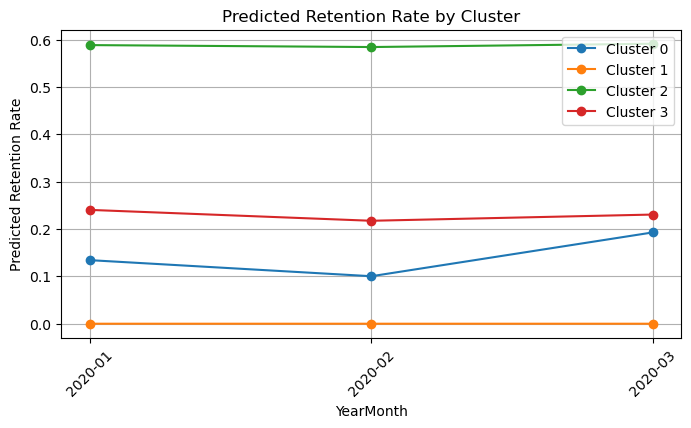

In [28]:
# 예측 결과에 대한 클러스터별 시각화
plt.figure(figsize=(8, 4))

for cluster in predictions['Cluster'].unique():
    cluster_predictions = predictions[predictions['Cluster'] == cluster]
    plt.plot(cluster_predictions['YearMonth'].astype(str), cluster_predictions['PredictedRetention'], marker='o', linestyle='-', label=f'Cluster {cluster}')

plt.title('Predicted Retention Rate by Cluster')
plt.xlabel('YearMonth')
plt.ylabel('Predicted Retention Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

- 잔존율 예측을 위해 ARIMA 모델 적용
- ARIMA 모델: 시간에 따라 변화하는 데이터 패턴을 모델링하여 미래 값 예측


##### 각 클러스터 특징

1. Cluster 0: 이탈 위험 그룹
    - 잔존율 상대적으로 낮음. 이탈할 가능성 높음. 고객의 충성도가 낮거나, 제품 또는 서비스 만족도가 낮을 수 있음
    

2. Cluster 1: 주기적 구매 그룹
    - 정기적 구매 덕분에 잔존율 안정적으로 유지중.
    

3. Cluster 2: 대량 구매 그룹
    - 매우 높은 잔존율. 제품 또는 서비스에 대한 만족감과 브랜드에 대한 충성도가 높을 것으로 예상.
    

4. Cluster 3: 신규 구매자 그룹
    - 중간의 잔존율. 초기 구매 이후 잔존율이 상대적으로 낮진 않아서 보통의 안정적인 수준 유지. 신규 고객이 첫 구매 이후 일정 이상의 충성도를 보이고 있다고 예상

#### 2-6. 분석 결과에 따른 Cluster별 마케팅 전략 제안

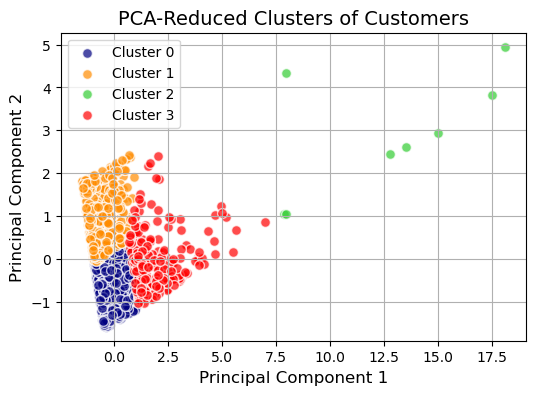

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 클러스터별로 PCA 시각화
plt.figure(figsize=(6, 4))
colors = ['navy', 'darkorange', 'limegreen', 'red']

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_normalized)

rfm_customer_data['PCA1'] = rfm_pca[:, 0]
rfm_customer_data['PCA2'] = rfm_pca[:, 1]

for i, color in zip(range(optimal_clusters), colors):
    plt.scatter(rfm_customer_data.loc[rfm_customer_data['Cluster'] == i, 'PCA1'],
                rfm_customer_data.loc[rfm_customer_data['Cluster'] == i, 'PCA2'],
                s=50, c=color, label=f'Cluster {i}', alpha=0.7, edgecolors='w')
plt.title('PCA-Reduced Clusters of Customers', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()

1. Cluster 0: 이탈 위험 그룹

    - 맞춤형 프로모션: 고객의 과거 구매 데이터를 분석하여 제품 및 서비스를 상기시키는 푸시 알림 이용. 이메일, 인스타그램, SMS 등
    - 고객 만족도 개선: 고객 피드백을 수집하여 서비스 개선을 통해, 브랜드 만족도를 높이고, 이탈률 감소하도록
    - 이탈 예방 할인: 이탈 가능성이 높은 고객 위주로 특별 할인 쿠폰을 제공하여 재구매 유도
    
------
    
2. Cluster 1: 주기적 구매 그룹

    - 리워드 이벤트 강화: 정기 구매자를 위해 포인트 적립, 멤버십 혜택, 생일 할인 쿠폰 등을 제공하여 충성도 강화
    - 구독 서비스 제안: 정기적으로 구매할 시, 혜택이 더욱 배가 되는 구독 서비스를 제안하여, 편리함 제공하는 동시에 장기적인 매출 확보
    - 신제품 우선 예약 제공: 새로운 제품 및 서비스를 우선 구매할 수 있는 서비스를 제공하여, 관심을 유도
    

_______

    
3. Cluster 2: 대량 구매 그룹

    - VIP 프로그램 개발: 대량 구매 고객을 위한 특별한 혜택과 서비스 제공
    - 맞춤형 B2B 솔루션: 기업 고객의 경우, 그들의 비즈니스 요구사항을 충족시키고, 장기적인 관계를 구출할 수 있도록하는 솔루션 개발
    - 대량 구매 혜택: 대량 구매시 추가 할인, 제품 및 서비스의 총 구매 금액이 일정 이상을 넘지 않아도 제공하는 N번의 무료 배송 등, 고객 충성도와 만족도를 높일 수 있는 방향 제시
    

_______


4. Cluster 3: 신규 구매자 그룹

    - 환영 프로모션: 신규 가입 고객, 첫 구매 고객을 위한 환영 할인 코드나 일정 수준 이상의 선물을 제공하여 브랜드 경험 강화
    - 원활한 커뮤니케이션 창구: 첫 구매 후 고객의 피드백을 요청드리고, 반영. 또, 일정 기간 신규 회원에게 리워드를 제공하여 추가 구매를 유도.

In [30]:
: 

SyntaxError: invalid syntax (644980847.py, line 1)